<a href="https://www.kaggle.com/code/ergunenesyazirlioglu/study-habits-machine-learning-81-68?scriptVersionId=250820232" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-study-habits/student_study_habits.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-study-habits/student_study_habits.csv')

# Dataset Review

In [3]:
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [5]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.duplicated().sum()

0

# Dataset Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


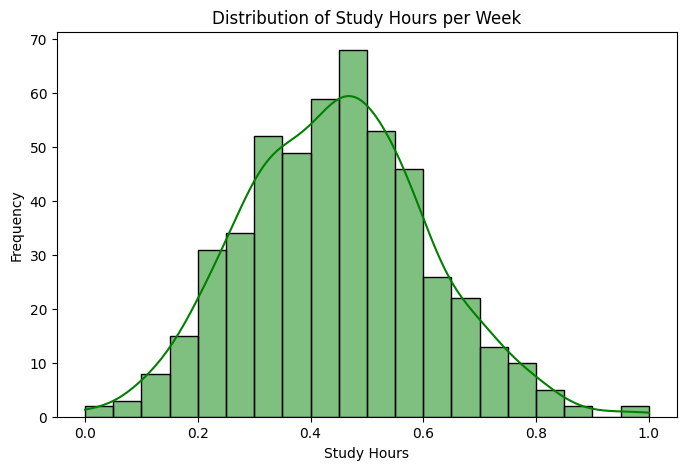

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['study_hours_per_week'], bins=20, kde=True, color='green')
plt.title('Distribution of Study Hours per Week')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


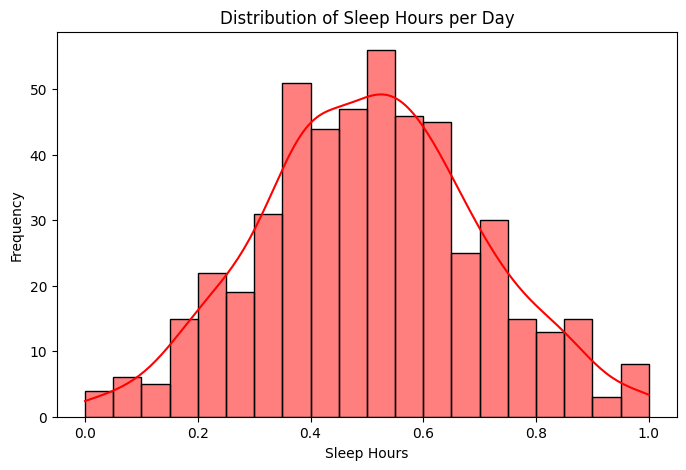

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours_per_day'], bins=20, kde=True, color='red')
plt.title('Distribution of Sleep Hours per Day')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


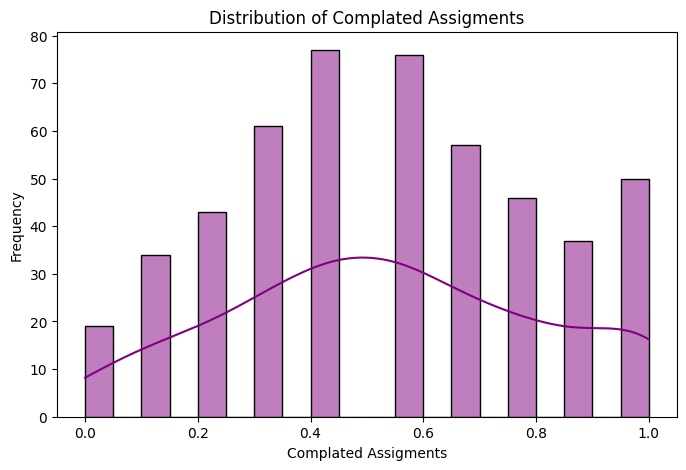

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['assignments_completed'], bins=20, kde=True, color='purple')
plt.title('Distribution of Complated Assigments')
plt.xlabel('Complated Assigments')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


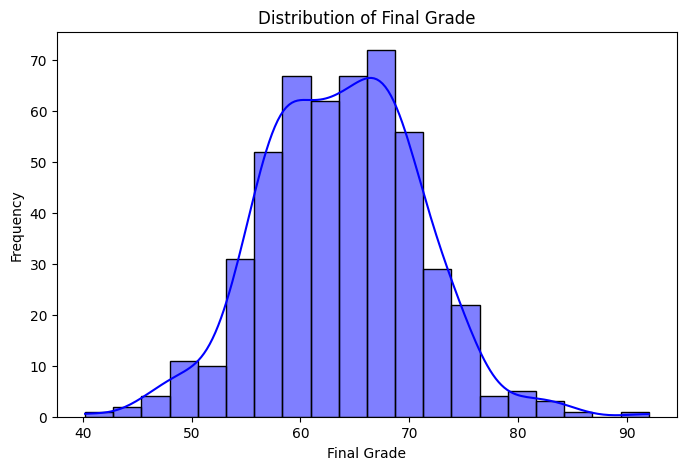

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_grade'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

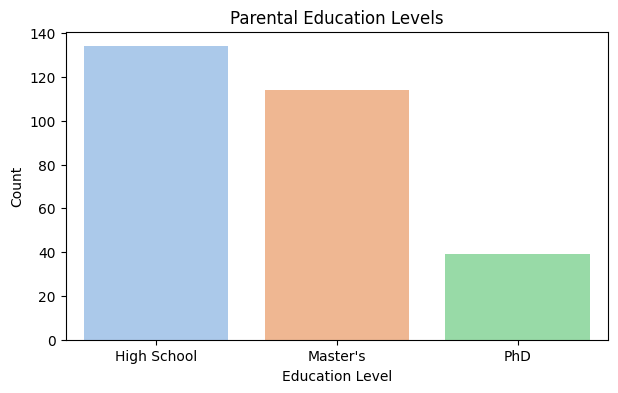

In [11]:
education_col = ['parental_education_High School', "parental_education_Master's", 'parental_education_PhD']
education_counts = df[education_col].sum()

plt.figure(figsize=(7, 4))
sns.barplot(x=education_counts.index.str.replace('parental_education_', ''), y=education_counts.values, palette='pastel')
plt.title('Parental Education Levels')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.show()

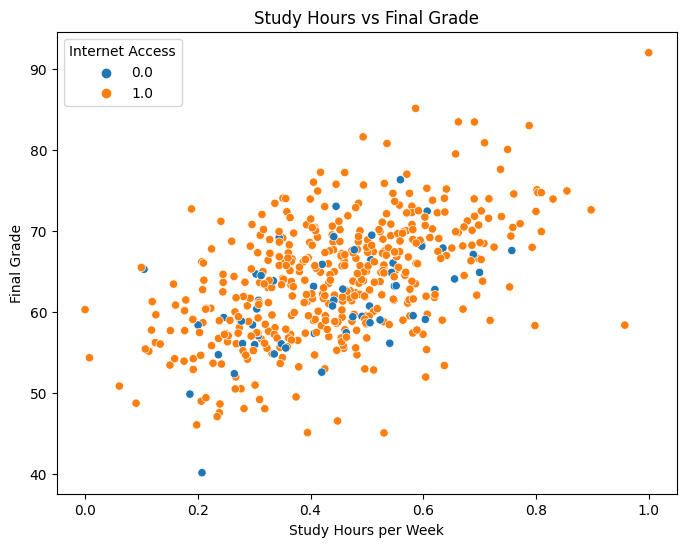

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_week', y='final_grade', data=df, hue='internet_access_Yes')
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')
plt.legend(title='Internet Access')
plt.show()

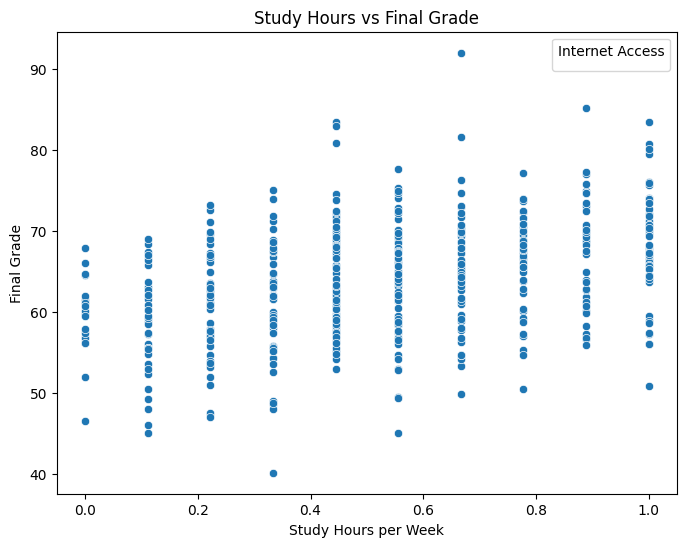

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='assignments_completed', y='final_grade', data=df)
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')
plt.legend(title='Internet Access')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

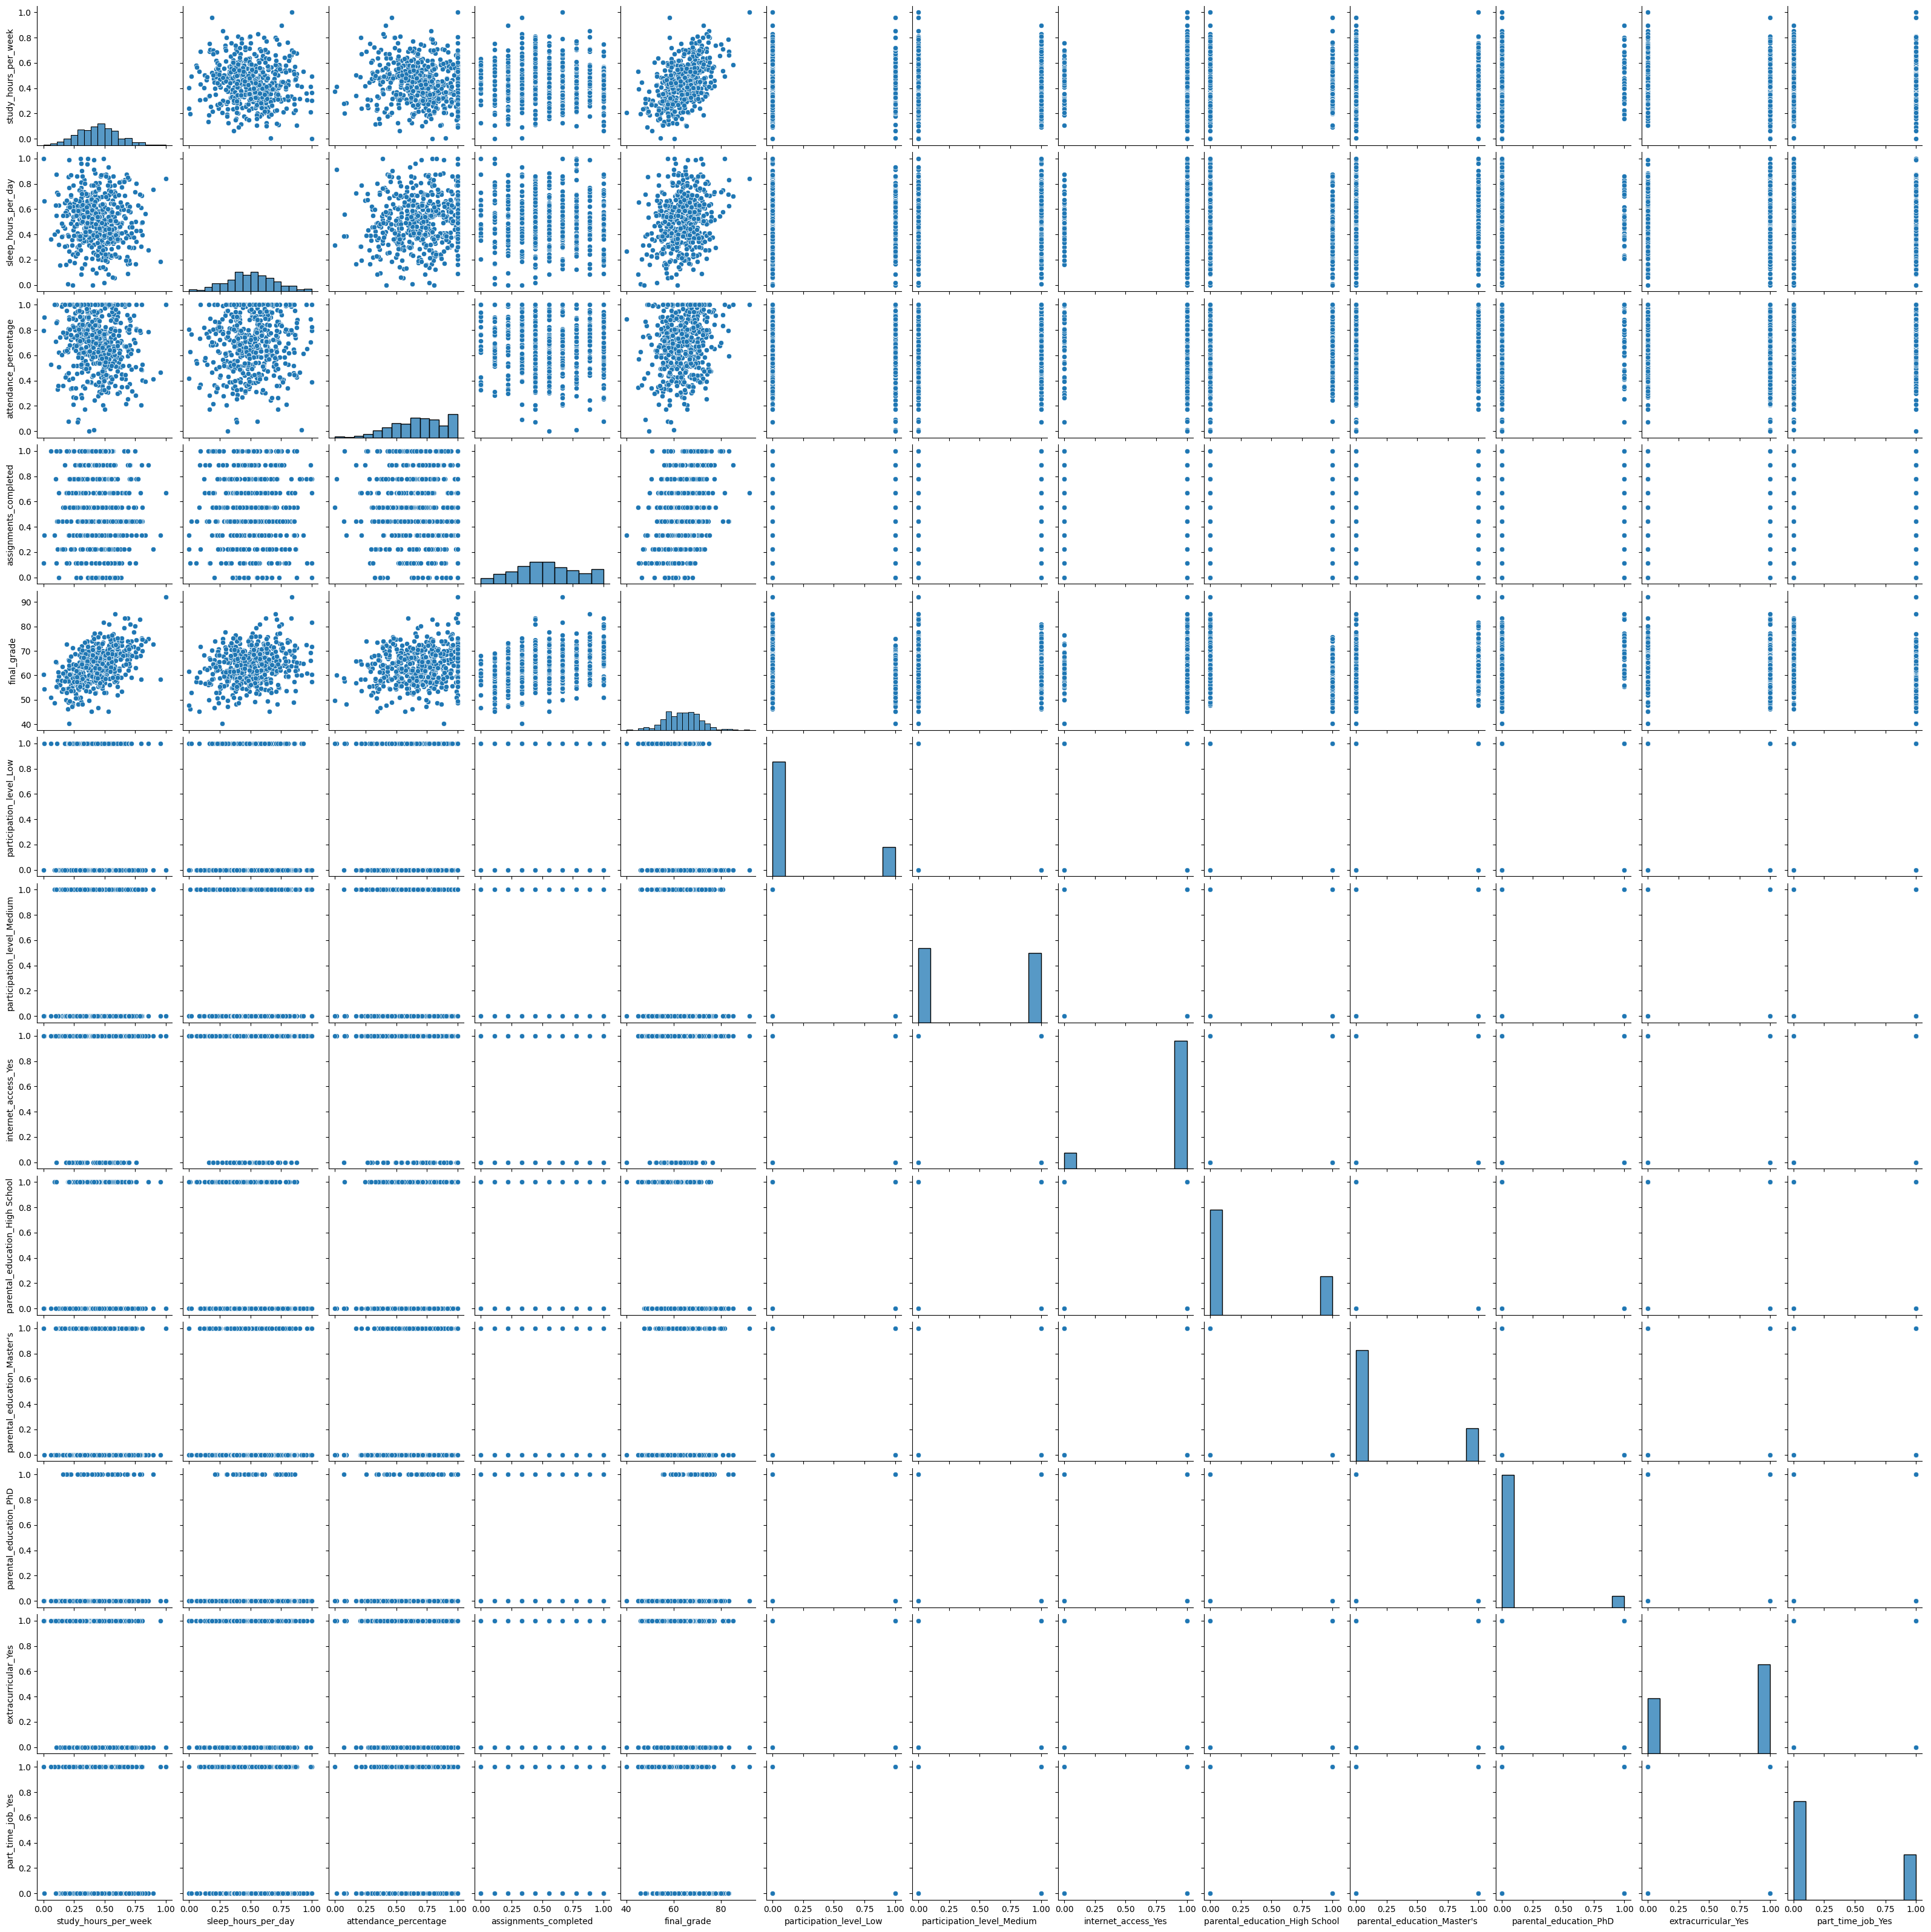

In [14]:
sns.pairplot(df)

                                study_hours_per_week  sleep_hours_per_day  \
study_hours_per_week                        1.000000            -0.075378   
sleep_hours_per_day                        -0.075378             1.000000   
attendance_percentage                      -0.064476             0.078977   
assignments_completed                       0.012121            -0.040785   
final_grade                                 0.517297             0.237757   
participation_level_Low                    -0.042347             0.002322   
participation_level_Medium                  0.053687             0.006176   
internet_access_Yes                         0.022966             0.019395   
parental_education_High School              0.010111            -0.127791   
parental_education_Master's                 0.004026             0.020758   
parental_education_PhD                      0.062669             0.038618   
extracurricular_Yes                        -0.012191            -0.031848   

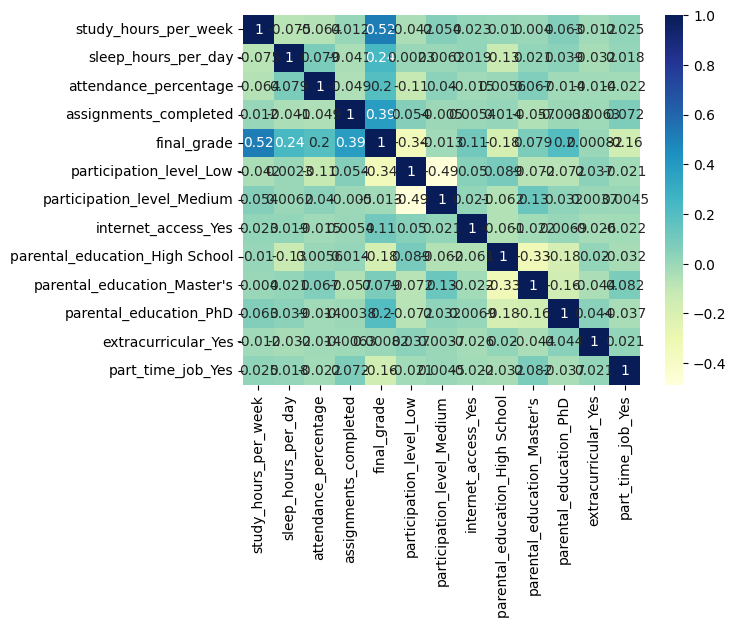

In [15]:
co_mtx = df.corr(numeric_only=True)
print(co_mtx)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

# Creating Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = df.drop('final_grade', axis=1)
y = df['final_grade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 81.68%
